In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_undersampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

df_n

,X,Y,Orientation,Dir,PossessionTeamAbbrCode,HomeScoreBeforePlay,VisitorScoreBeforePlay,PlayerHeightInches,PlayerWeight,PlayerCollegeNameCode,VisitorTeamAbbrCode,Week,isFirstDown,DefensiveEnds,DefensiveTackles
0,0.810724,0.470166,0.755453,0.714254,0.967742,0.122807,0.000000,0.222222,0.166667,0.166078,0.967742,0.5000,0.0,0.50,0.4
1,0.915307,0.525773,0.739615,0.520172,0.225806,0.175439,0.000000,0.555556,0.583333,0.007067,0.225806,0.7500,0.0,0.75,0.2
2,0.591659,0.544205,0.674123,0.701945,0.645161,0.473684,0.338983,0.444444,0.444444,0.148410,0.387097,0.0000,0.0,0.50,0.4
3,0.303391,0.540769,0.947151,0.202612,0.548387,0.000000,0.000000,0.444444,0.236111,0.844523,0.548387,0.6875,0.0,0.75,0.2
4,0.237030,0.474539,0.464447,0.965435,0.838710,0.000000,0.101695,0.777778,0.694444,0.166078,0.838710,0.1875,0.0,0.00,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11953,0.701283,0.411434,0.157131,0.210281,0.064516,0.105263,0.474576,0.777778,0.763889,0.127208,0.064516,0.6875,1.0,0.00,0.6
11954,0.247846,0.398313,0.141821,0.228202,0.064516,0.105263,0.593220,0.333333,0.444444,0.130742,0.064516,0.6875,1.0,0.00,0.6
11955,0.315490,0.539519,0.268638,0.328786,0.064516,0.105263,0.593220,0.333333,0.444444,0.130742,0.064516,0.6875,1.0,0.00,0.6
11956,0.602383,0.639175,0.137625,0.147930,0.516129,0.105263,0.711864,0.777778,0.569444,0.007067,0.064516,0.6875,1.0,0.00,0.4


In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8370, 14)
(3588, 14)
(8370,)
(3588,)


In [6]:
# Create Decision Tree classifer object
rfc = RandomForestClassifier(n_estimators=10,criterion="entropy", max_depth=4)

In [7]:
# Train Decision Tree Classifer
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
#Predict the response for test dataset
y_pred = rfc.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at['Random Forest, Oversampled', 'Accuracy'] = accuracy
acc.at['Random Forest, Oversampled', 'Precision'] = precision
acc.at['Random Forest, Oversampled', 'Recall'] = recall
acc.at['Random Forest, Oversampled', 'F1'] = f1
acc.to_csv("../data/external/accuracies.csv")

Accuracy: 0.526198
Precision: 0.513503
Recall: 0.720996
F1 score: 0.599812


In [10]:
#Present Confusion Matrix to show accuracy
print(classification_report(y_test,y_pred),'\n',confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.34      0.42      1821
           1       0.51      0.72      0.60      1767

    accuracy                           0.53      3588
   macro avg       0.53      0.53      0.51      3588
weighted avg       0.53      0.53      0.51      3588
 
 [[ 614 1207]
 [ 493 1274]]


In [11]:
features = list(X_train)
#features

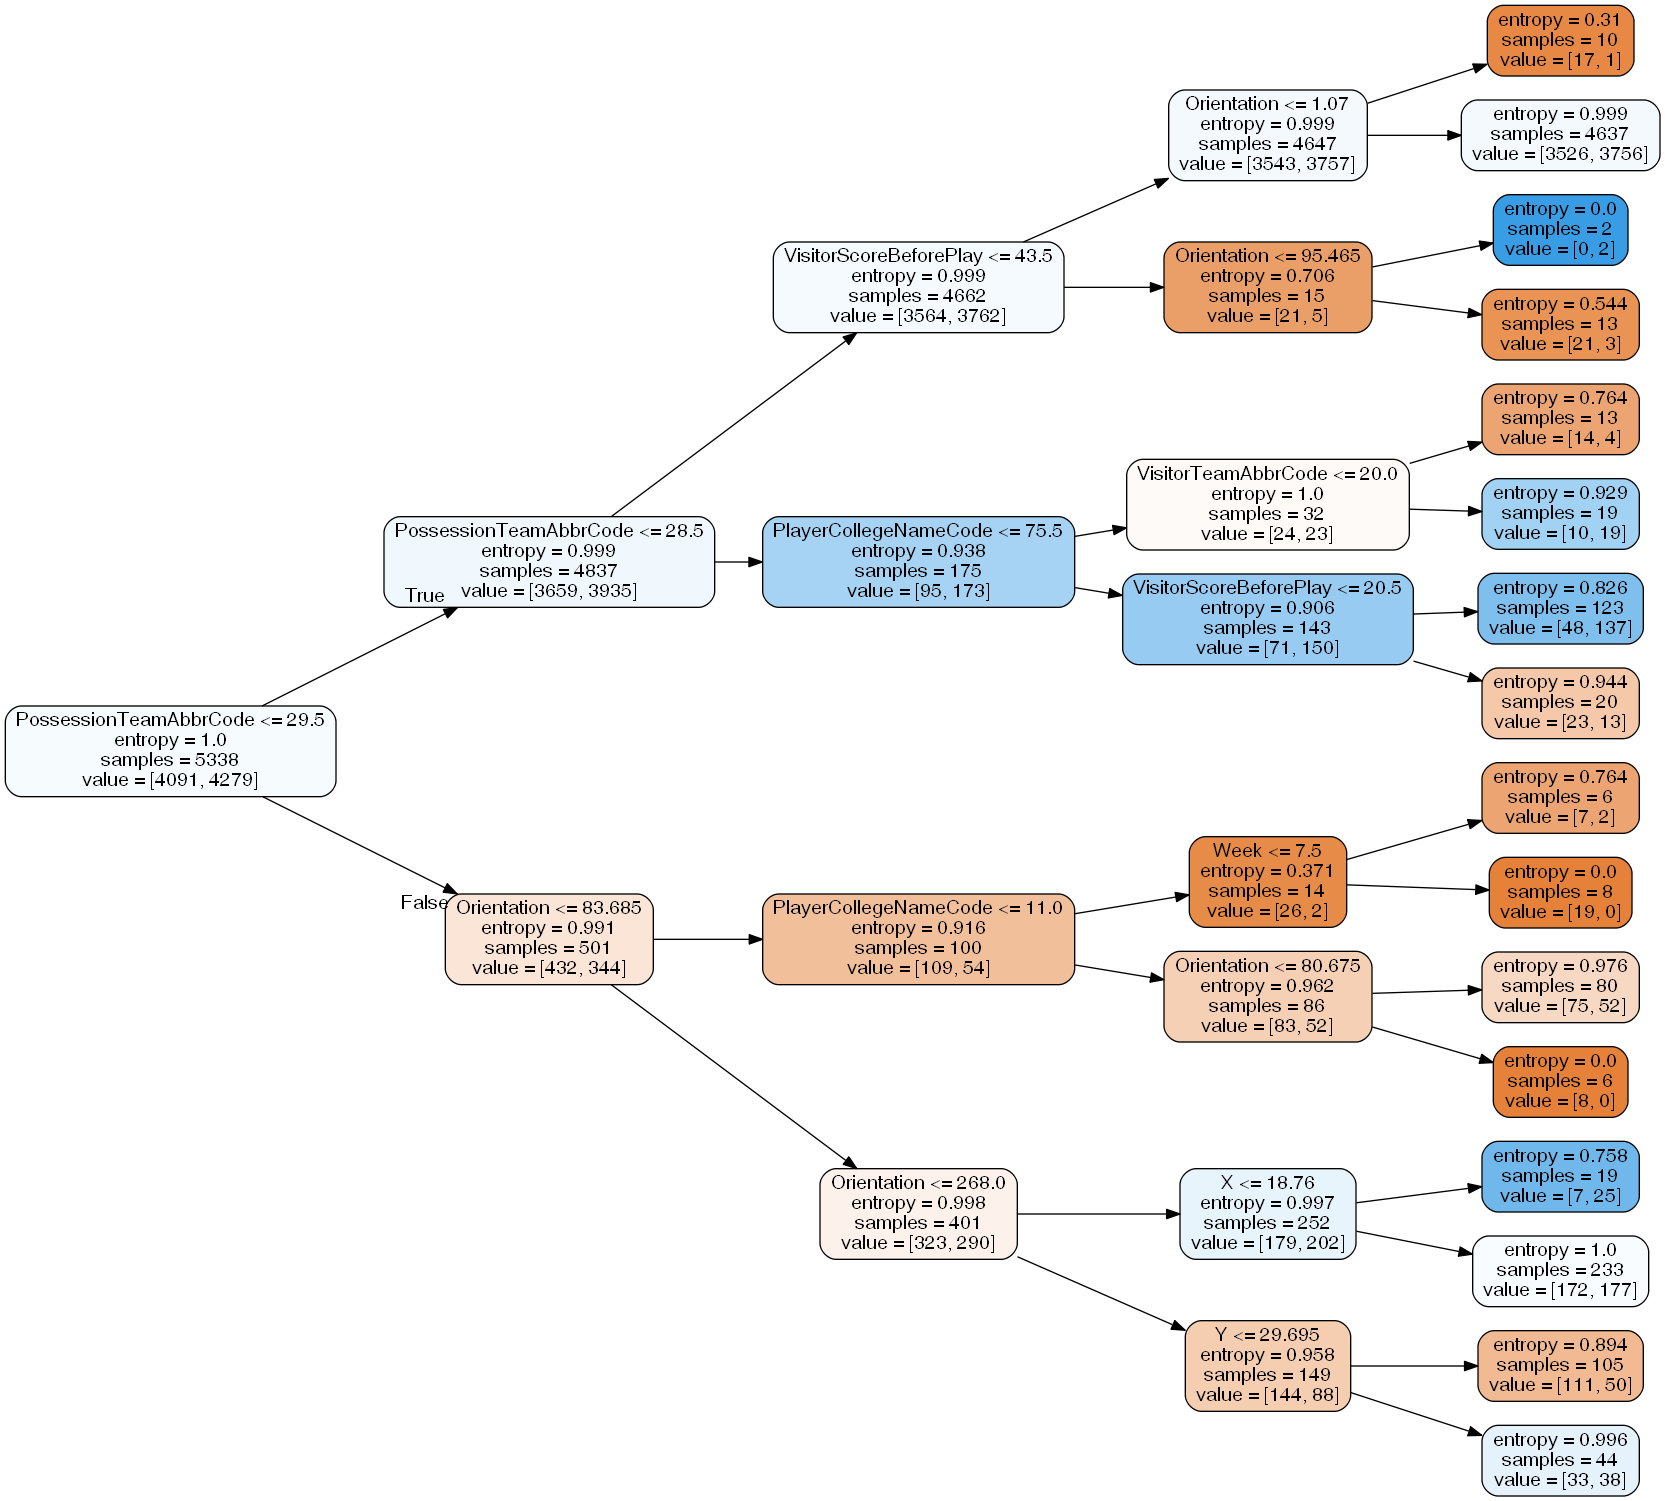

In [12]:
dot_data = StringIO()  
export_graphviz(rfc.estimators_[0], out_file=dot_data,feature_names=features,filled=True,rounded=True,rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png(), width=7860, height=2160)